In [7]:
import pandas as pd
df = pd.read_csv("drugs_data.csv")
df.head(3)

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2017,Tot_Dsg_Unts_2017,Tot_Clms_2017,Tot_Benes_2017,Avg_Spnd_Per_Dsg_Unt_Wghtd_2017,Avg_Spnd_Per_Clm_2017,...,Tot_Spndng_2021,Tot_Dsg_Unts_2021,Tot_Clms_2021,Tot_Benes_2021,Avg_Spnd_Per_Dsg_Unt_Wghtd_2021,Avg_Spnd_Per_Clm_2021,Avg_Spnd_Per_Bene_2021,Outlier_Flag_2021,Chg_Avg_Spnd_Per_Dsg_Unt_20_21,CAGR_Avg_Spnd_Per_Dsg_Unt_17_21
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,217938.04,1014318.0,8595.0,3025.0,0.216105,25.356375,...,102280.76,459384.0,3708,1313.0,0.223001,27.583808,77.898522,0,0.024346,0.007885
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,217938.04,1014318.0,8595.0,3025.0,0.216105,25.356375,...,102280.76,459384.0,3708,1313.0,0.223001,27.583808,77.898522,0,0.024346,0.007885
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,402124.68,1850703.0,15403.0,5967.0,0.217359,26.106906,...,131927.33,566872.0,4564,1766.0,0.232812,28.906076,74.704037,0,0.159124,0.017317


In [8]:
tot_manf = df[df['Mftr_Name'] == 'Overall']
tot_manf = tot_manf[['Gnrc_Name', 'Tot_Mftr']]
tot_manf.head()

,Gnrc_Name,Tot_Mftr
0,"Pen Needle, Diabetic",1
2,"Pen Needle, Diabetic",1
4,Abacavir Sulfate,7
12,Abacavir Sulfate/Lamivudine,5
18,Abacavir/Lamivudine/Zidovudine,1


In [9]:
grouped_sum = tot_manf.groupby('Gnrc_Name').sum()
grouped_sum = grouped_sum.reset_index()
grouped_sum

,Gnrc_Name,Tot_Mftr
0,0.9 % Sodium Chloride,8
1,Aa 5 %/Calcium/Lytes/Dext 20 %,1
2,Aa 5%/D15w/Electrolytes,1
3,Abacavir Sulfate,8
4,Abacavir Sulfate/Lamivudine,6
...,...,...
1878,Zoledronic Acid/Mannitol-Water,8
1879,Zolmitriptan,17
1880,Zolpidem Tartrate,24
1881,Zonisamide,8


In [10]:
sorted_df = grouped_sum.sort_values(by='Tot_Mftr')
sorted_df

,Gnrc_Name,Tot_Mftr
1882,Zoster Vaccine Live/PF,1
1312,PNV No.118/Iron Fumarate/FA,1
591,Epoprostenol Sodium (Glycine),1
592,Eptinezumab-Jjmr,1
593,Eravacycline Di-Hydrochloride,1
...,...,...
1419,Potassium Chloride,52
45,Alcohol Antiseptic Pads,53
1674,"Syringe And Needle,Insulin,1ml",59
1066,Metformin HCl,66


In [14]:
sorted_df['Tot_Mftr'] = sorted_df['Tot_Mftr'].astype("str")
sorted_df = sorted_df[['Tot_Mftr', 'Gnrc_Name']]
sorted_df

,Tot_Mftr,Gnrc_Name
1882,1,Zoster Vaccine Live/PF
1312,1,PNV No.118/Iron Fumarate/FA
591,1,Epoprostenol Sodium (Glycine)
592,1,Eptinezumab-Jjmr
593,1,Eravacycline Di-Hydrochloride
...,...,...
1419,52,Potassium Chloride
45,53,Alcohol Antiseptic Pads
1674,59,"Syringe And Needle,Insulin,1ml"
1066,66,Metformin HCl


In [15]:
sorted_df['Tot_Mftr'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '34', '35',
       '36', '37', '41', '42', '49', '50', '51', '52', '53', '59', '66',
       '77'], dtype=object)

In [16]:
mnft_count = sorted_df['Tot_Mftr'].value_counts()
mnft_count = mnft_count.to_frame()
mnft_count = mnft_count.reset_index()
mnft_count.head()

,Tot_Mftr,count
0,1,825
1,2,191
2,3,133
3,4,93
4,5,72


In [17]:
mnft_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tot_Mftr  46 non-null     object
 1   count     46 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 868.0+ bytes


In [18]:
mnft_count['Tot_Mftr'] = mnft_count['Tot_Mftr'].astype("int")
print(mnft_count.head())
print(mnft_count.tail())

   Tot_Mftr  count
0         1    825
1         2    191
2         3    133
3         4     93
4         5     72
    Tot_Mftr  count
41        52      1
42        53      1
43        59      1
44        66      1
45        77      1


In [19]:
mnft_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Tot_Mftr  46 non-null     int64
 1   count     46 non-null     int64
dtypes: int64(2)
memory usage: 868.0 bytes


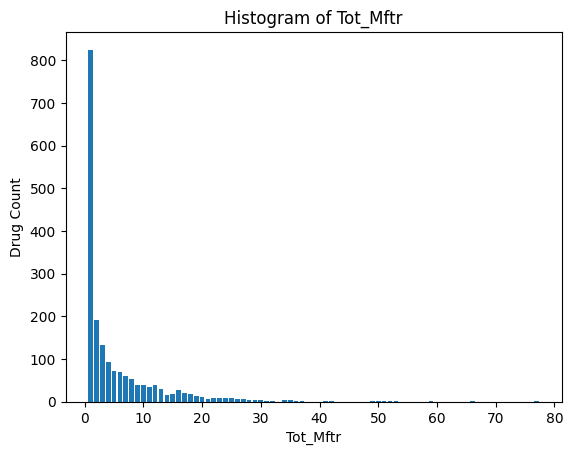

In [20]:
import matplotlib.pyplot as plt

# Plotting
plt.bar(mnft_count['Tot_Mftr'], mnft_count['count'])

# Adding labels and title
plt.xlabel('Tot_Mftr')
plt.ylabel('Drug Count')
plt.title('Histogram of Tot_Mftr')

# Display the plot
plt.show()


In [21]:
mnft_count.to_csv('n_manf_count.csv', index=False)